In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import preproccessing as prep

### TODO

- [ ] correlation acwi usd inflation
- [ ] correlation acwi pln inflation
- [ ] correlation acwi usd edo (rolling avr inflation)
- [ ] correlation acwi pln edo (rolling avr inflation)
- [ ] correlation wig inflation
- [ ] correlation wig edo (rolling avr inflation)
---
- [ ] uspojnic daty

In [3]:
acwi = pd.read_excel('acwi_usd_net_31.11.23.xlsx',index_col='Date', parse_dates=True)
acwi = acwi.squeeze()
acwi = (acwi+1).cumprod()
acwi_returns = prep.log_returns(acwi)
acwi_short = acwi['2003-01-01':]
acwi_short_returns = acwi_returns['2003-01-01':]

In [28]:
wig = prep.loadStooqData('mwig40','2002-12-01','m')
wig_returns = prep.log_returns(wig)
wig_returns.describe()

count    255.000000
mean       0.007434
std        0.063114
min       -0.327201
25%       -0.027199
50%        0.011015
75%        0.040279
max        0.198448
Name: Zamkniecie, dtype: float64

In [12]:
usdpln = prep.loadStooqData('usdpln','2002-12-01','d')
usdpln = usdpln.resample('BM').last()
usdpln_ret = prep.log_returns(usdpln)[:'2023-10-31']
usdpln_ret.name = 'usdpln'

acwi_pln = (acwi_short * usdpln).dropna()
acwi_pln_returns = prep.log_returns(acwi_pln)

In [59]:
cpi_y_data = prep.loadStooqData('cpiypl.m','2002-12-31','m')
cpi_y = cpi_y_data['2003-01-01':'2021-12-31'] /100
cpi_y = np.log(cpi_y+1)
cpi_y = cpi_y.reset_index()
cpi_y.set_index(cpi_y['Data'], inplace=True)
cpi_y = cpi_y.dropna()

In [21]:
cpi_m_data = prep.loadStooqData('cpiypl.m','2002-12-31','m')
cpi_m = cpi_m_data['2003-01-01':'2021-12-31'] /100
cpi_m = np.log(cpi_m+1)
cpi_m = cpi_m.reset_index()
cpi_m.set_index(cpi_m['Data'], inplace=True)
cpi_m = cpi_m.dropna()

In [24]:
cpi_m["Zamkniecie"].corr(acwi_pln_returns)

-0.09230204873325484

In [25]:
cpi_m["Zamkniecie"].corr(acwi_short_returns)

-0.03317546479528452

In [30]:
cpi_m["Zamkniecie"].corr(wig_returns)

-0.15887853301649987

In [60]:
cpi_y["Zamkniecie"].corr(acwi_pln_returns)

-0.09230204873325484

In [68]:
corr = cpi_m.rolling(36).corr(acwi_pln_returns)
corr.plot()

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [36]:
edo = cpi_y.rolling(12).mean()
edo.index = cpi_y['Data']

C:\Users\matsz\AppData\Local\Temp\ipykernel_42776\2931676746.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Data'], dtype='object')
  edo = cpi_y.rolling(12).mean()


In [37]:
edo['Zamkniecie'].corr(acwi_pln_returns)

0.07295197744626172

In [39]:
acwi_real = acwi_pln_returns - cpi_m['Zamkniecie']

In [41]:
prep.assets_performance(acwi_real)

Annualised Mean    -0.192551
Annualised Sigma    0.142472
Skew               -0.657034
Kurtosis            0.852234
Sharp_ratio        -5.411172
Max drowdawn       -0.937113
dtype: float64

In [42]:
np.percentile(acwi_real,[5,25,50,75,95])

array([nan, nan, nan, nan, nan])

<AxesSubplot:>

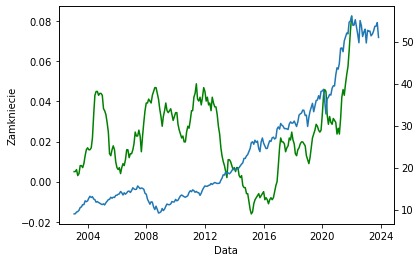

In [57]:
fig, ax = plt.subplots()
sns.lineplot(y=cpi_y['Zamkniecie'],x=cpi_y['Data'],ax=ax, color='green')

ax2 = ax.twinx()
sns.lineplot(data=acwi_pln, ax=ax2)
